In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 1
%aimport loss_functions

import loss_functions

Create some sample data in 2 dimensions to help debug the algorithm

In [3]:
xis = np.zeros((40, 2))
yis = np.zeros(40)
center1 = np.array([[-0.5, -0.5]])
center2 = np.array([[0.25, 0.75]])
for i in range(0, 20):
    xis[i, :] = np.random.normal((1, 2))/2 + center1
    yis[i] = -1
for i in range(20, 40):
    xis[i, :] = np.random.normal((1, 2))/2 + center2
    yis[i] = 1    

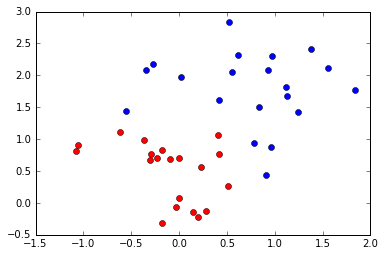

In [4]:
# Plot the data
plt.plot(xis[:20, 0], xis[:20, 1], 'ro')
plt.plot(xis[20:40, 0], xis[20:40, 1], 'bo');

Have a function to draw the separation plane in 2D (i.e. a line), given a normal vector w and an offset (from origin).

In [5]:
# Function to draw a line, given vector w (normal)
def draw_line(w, offset=0.0):
    xs = np.array([w[1], 0., -w[1]])
    ys = np.array([-w[0], 0., w[0]])
    
    w = np.array(w)
    dist = offset/np.sqrt(w.dot(w))
    
    xs += dist*w[0]
    ys += dist*w[1]
    
    plt.plot(xs, ys, 'k-')

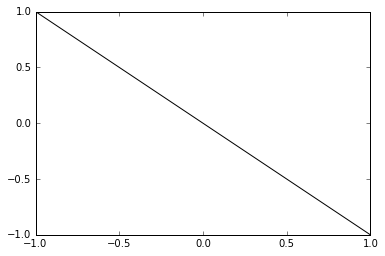

In [6]:
# Test drawing a line
draw_line([1., 1.])

In [7]:
# Utility function to normalize a vector.
def norm(v):
    return v / np.sqrt(v.dot(v))

In [8]:
# Test first version of the loss function.
lf = loss_functions.LossSVM1(lambd=0.1, xis=xis, yis=yis)
w = norm(np.array([0, 1]))
print(lf.eval_value(w))
w = norm(np.array([1, 0]))
print(lf.eval_value(w))
w = norm(np.array([1, 1]))
print(lf.eval_value(w))
w = norm(np.array([1, 0.3]))
print(lf.eval_value(w))  # Looks reasonable that this should be minimum, looking by eye at the figure of the data above.

0.869432643964
0.738134585062
0.748171801193
0.693994958691


In [9]:
# Test gradient of the loss function
w = norm(np.array([0, 1]))
print(lf.eval_grad(w))
w = norm(np.array([1, 0]))
print(lf.eval_grad(w))
w = norm(np.array([1, 1]))
print(lf.eval_grad(w))
w = norm(np.array([1, 0.3]))
print(lf.eval_grad(w)) 

[-0.1225374   0.39443264]
[ 0.03813459 -0.40903137]
[ 0.0762915  0.3453871]
[ 0.13087725  0.06485967]


In [10]:
values = np.zeros((100, 100))
grads_x = np.zeros((100, 100))
grads_y = np.zeros((100, 100))
for x in range(100):
    for y in range(100):
        w = np.array([(-50+x)/20.0, (-50+y)/20.0])
        values[x,y] = lf.eval_value(w)
        g = lf.eval_grad(w)
        grads_x[x,y] = g[0]
        grads_y[x,y] = g[1]

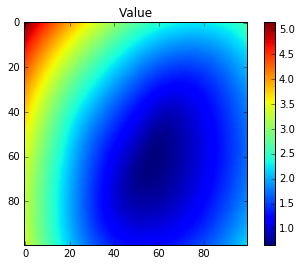

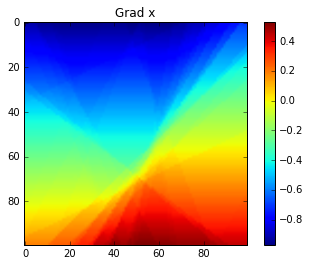

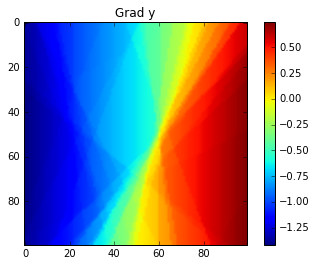

In [11]:
plt.title('Value')
plt.imshow(values)
plt.colorbar()

plt.figure()
plt.title('Grad x')
plt.imshow(grads_x)
plt.colorbar()

plt.figure()
plt.title('Grad y')
plt.imshow(grads_y)
plt.colorbar();

Test the gradient descent solvers.

In [12]:
%aimport solvers

import solvers

In [13]:
gds = solvers.GradientDescentSolver(eta=0.01, N=800, loss_function=lf)

In [14]:
losses, ws = gds.solve(np.array([-0.8, -1.]))

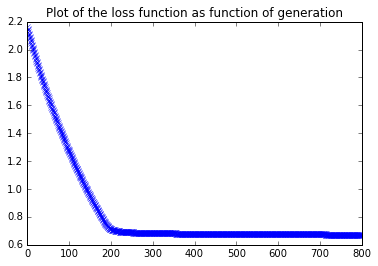

In [15]:
plt.plot(losses, 'x');
plt.title('Plot of the loss function as function of generation')

Plot trajectories of the w vector, note that despite starting at different places, the algorithm ends up at the same point (there is a unique minimum for this data set and loss function).

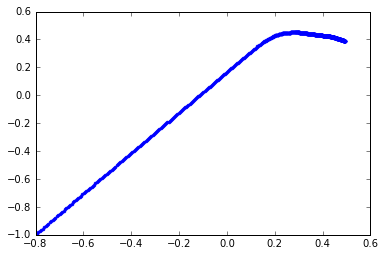

In [16]:
# Plot trajectory of w
def plot_trajectory(ws):
    wxs = []
    wys = []
    for w in ws:
        wxs.append(w[0])
        wys.append(w[1])
    plt.plot(wxs, wys, '.')
plot_trajectory(ws)

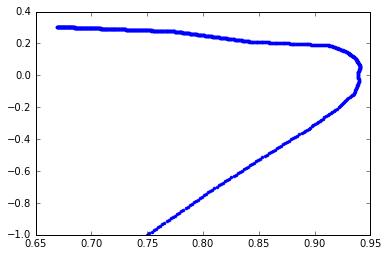

In [17]:
# For fun, plot a different trajectory
losses, ws = gds.solve(np.array([0.75, -1.]))
plot_trajectory(ws)

Plot the data, together with the separation plane. Notice that we are using the loss function that doesn't allow the plane to move away from the origin.

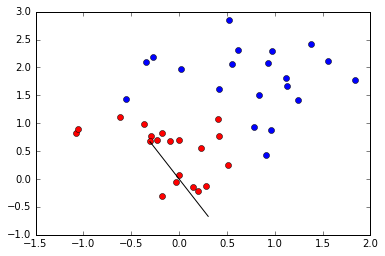

In [18]:
plt.plot(xis[:20, 0], xis[:20, 1], 'ro')
plt.plot(xis[20:40, 0], xis[20:40, 1], 'bo');
draw_line(ws[-1])

In [19]:
# Now, a loss function with a constant term to move the plane from the origin
lf2 = loss_functions.LossSVM2(lambd=1, xis=xis, yis=yis)
gds2 = solvers.GradientDescentSolver(eta=0.0001, N=30000, loss_function=lf2)
losses, ws = gds2.solve(np.array([1., -1., -1.]))

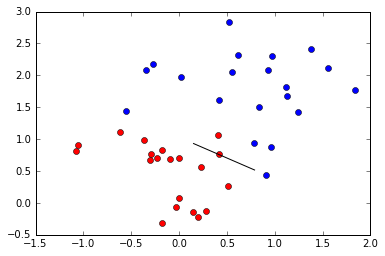

In [20]:
last_w = ws[-1]
plt.plot(xis[:20, 0], xis[:20, 1], 'ro')
plt.plot(xis[20:40, 0], xis[20:40, 1], 'bo');
draw_line(last_w[1:], last_w[0])

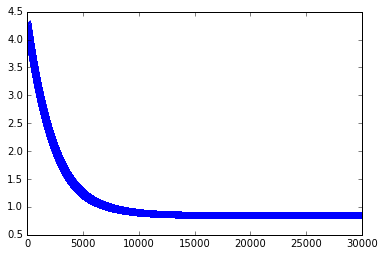

In [21]:
plt.plot(losses, 'x')

Finally test the predictions of the classifier

In [22]:
from classifier import SvmClassifier
%aimport classifier

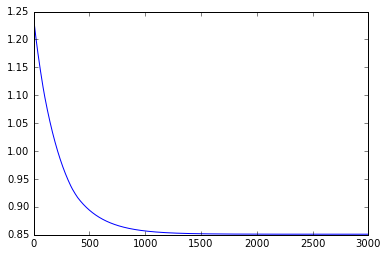

In [23]:
sc = SvmClassifier(1, 0.001)
sc.fit(xis, yis, N=3000)
plt.figure()
plt.plot(sc.losses);

In [24]:
# These should mostly be -1
sc.predict(xis[:20])

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [25]:
# These should mostly be +1.
sc.predict(xis[20:])

array([-1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.])